In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
df = pd.read_csv('./BTC.csv')
df['Date'] = pd.to_datetime(df['Date'],format='%d-%b-%y')

df = df.sort_values(by='Date', ascending=True)
print(df)
df1=df.reset_index()['Price']

           Date    Price       Open       High        Low     Vol. Change %
2023 2017-12-01  10861.5   9,947.10  10,942.80   9,420.90  131.92K    9.20%
2022 2017-12-02  10912.7  10,861.50  11,175.20  10,715.50   86.83K    0.47%
2021 2017-12-03  11246.2  10,912.70  11,851.10  10,578.40  122.13K    3.06%
2020 2017-12-04  11623.9  11,244.20  11,624.60  10,917.80   93.17K    3.36%
2019 2017-12-05  11667.1  11,624.40  11,901.90  11,486.10   89.69K    0.37%
...         ...      ...        ...        ...        ...      ...      ...
4    2023-06-12  25906.8  25,927.90  26,080.70  25,635.00   40.75K   -0.08%
3    2023-06-13  25929.4  25,906.90  26,428.90  25,726.40   56.24K    0.09%
2    2023-06-14  25129.5  25,929.00  26,051.70  24,847.40   60.82K   -3.08%
1    2023-06-15  25591.3  25,129.50  25,732.80  24,838.00   68.38K    1.84%
0    2023-06-16  25599.1  25,591.90  25,617.50  25,451.40   61.21K    0.03%

[2024 rows x 7 columns]


In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1214, 1)
Test shape: (404, 1)
Validate shape: (406, 1)


In [5]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1416, 1)
Test shape: (404, 1)
Validate shape: (204, 1)


In [6]:
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1214, 1)
Test shape: (607, 1)
Validate shape: (203, 1)


In [7]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [8]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [9]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [10]:
# 8. Define LSTM Model

model=Sequential()
model.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(100,1))))
model.add(Bidirectional(LSTM(50,return_sequences=True)))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [11]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
18/18 [==============================] - 22s 490ms/step - loss: 0.0091 - val_loss: 0.0726
Epoch 2/200
18/18 [==============================] - 5s 278ms/step - loss: 0.0013 - val_loss: 0.0138
Epoch 3/200
18/18 [==============================] - 5s 264ms/step - loss: 8.5067e-04 - val_loss: 0.0062
Epoch 4/200
18/18 [==============================] - 5s 259ms/step - loss: 6.0407e-04 - val_loss: 0.0028
Epoch 5/200
18/18 [==============================] - 5s 289ms/step - loss: 5.9478e-04 - val_loss: 0.0025
Epoch 6/200
18/18 [==============================] - 6s 311ms/step - loss: 5.3984e-04 - val_loss: 0.0039
Epoch 7/200
18/18 [==============================] - 7s 399ms/step - loss: 5.5215e-04 - val_loss: 0.0022
Epoch 8/200
18/18 [==============================] - 7s 417ms/step - loss: 5.2951e-04 - val_loss: 0.0048
Epoch 9/200
18/18 [==============================] - 7s 390ms/step - loss: 4.5197e-04 - val_loss: 0.0020
Epoch 10/200
18/18 [==============================] - 7s 376ms

18/18 [==============================] - 5s 279ms/step - loss: 1.6065e-04 - val_loss: 0.0142
Epoch 79/200
18/18 [==============================] - 5s 286ms/step - loss: 1.4932e-04 - val_loss: 0.0127
Epoch 80/200
18/18 [==============================] - 5s 289ms/step - loss: 2.1248e-04 - val_loss: 0.0239
Epoch 81/200
18/18 [==============================] - 6s 355ms/step - loss: 2.0310e-04 - val_loss: 0.0187
Epoch 82/200
18/18 [==============================] - 5s 296ms/step - loss: 2.1162e-04 - val_loss: 0.0123
Epoch 83/200
18/18 [==============================] - 6s 310ms/step - loss: 2.0139e-04 - val_loss: 0.0199
Epoch 84/200
18/18 [==============================] - 5s 302ms/step - loss: 1.6604e-04 - val_loss: 0.0156
Epoch 85/200
18/18 [==============================] - 5s 275ms/step - loss: 1.9807e-04 - val_loss: 0.0110
Epoch 86/200
18/18 [==============================] - 5s 264ms/step - loss: 1.6881e-04 - val_loss: 0.0120
Epoch 87/200
18/18 [==============================] - 5s 29

Epoch 155/200
18/18 [==============================] - 5s 260ms/step - loss: 1.4068e-04 - val_loss: 0.0030
Epoch 156/200
18/18 [==============================] - 5s 259ms/step - loss: 1.4576e-04 - val_loss: 0.0101
Epoch 157/200
18/18 [==============================] - 5s 260ms/step - loss: 1.5268e-04 - val_loss: 0.0028
Epoch 158/200
18/18 [==============================] - 5s 261ms/step - loss: 1.6633e-04 - val_loss: 0.0075
Epoch 159/200
18/18 [==============================] - 5s 264ms/step - loss: 1.3037e-04 - val_loss: 0.0073
Epoch 160/200
18/18 [==============================] - 5s 278ms/step - loss: 1.4677e-04 - val_loss: 0.0074
Epoch 161/200
18/18 [==============================] - 6s 334ms/step - loss: 1.6512e-04 - val_loss: 0.0070
Epoch 162/200
18/18 [==============================] - 5s 280ms/step - loss: 1.2277e-04 - val_loss: 0.0091
Epoch 163/200
18/18 [==============================] - 5s 278ms/step - loss: 1.1738e-04 - val_loss: 0.0066
Epoch 164/200
18/18 [================

In [12]:
def evaluate_bi_lstm_model(actual, X_data):
    y_pred = model.predict(X_data)
    mse = mean_squared_error(actual, y_pred)
    mae = mean_absolute_error(actual, y_pred)
    mape = mean_absolute_percentage_error(actual, y_pred)
    rmse = mean_squared_error(actual, y_pred, squared=False)
    return y_pred, mse, mae, mape, rmse

In [13]:
y_pred_val, val_mse, val_mae, val_mape, val_rmse = evaluate_bi_lstm_model(yval, X_val)

4/4 [==============================] - 3s 42ms/step


In [14]:
y_pred_test, test_mse, test_mae, test_mape, test_rmse = evaluate_bi_lstm_model(ytest, X_test)

16/16 [==============================] - 1s 62ms/step


In [15]:
train_predict = model.predict(X_train)
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
y_pred_val = scaler.inverse_transform(y_pred_val)

35/35 [==============================] - 2s 59ms/step


In [17]:
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=142
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.30773789 0.30864925 0.30792296 0.31920148 0.30487938 0.30943464
 0.3187738  0.31413921 0.3141952  0.31252488 0.3064937  0.30378449
 0.31140356 0.3069385  0.28870966 0.28626017 0.28975633 0.28862101
 0.28840017 0.29502389 0.32814094 0.31588107 0.33196058 0.33286106
 0.32775213 0.33609749 0.33005076 0.3259434  0.32205066 0.31046732
 0.31007229 0.31617812 0.31517344 0.30951863 0.31747673 0.31472709
 0.29744849 0.29733496 0.29859781 0.2983132  0.295013   0.28743904
 0.26645899 0.26326922 0.26810287 0.29185589 0.32482053 0.33392328
 0.32743798 0.3386574  0.37579161 0.3683685  0.38460821 0.38090365
 0.38702348 0.37376826 0.39008261 0.37688649 0.37709489 0.38483838
 0.37171691 0.37377603 0.39070004 0.38570931 0.39261764 0.39234392
 0.38833454 0.38217272 0.38780731 0.38794884 0.38582129 0.38385703
 0.38433604 0.3903299  0.41077183 0.41961486 0.41458836 0.42238006
 0.42370356 0.42101457 0.42118098 0.4075665  0.42229919 0.39790542
 0.38899084 0.37381647 0.38235623 0.37889585 0.377

6 day output [[0.3590202]]
7 day input [0.31413921 0.3141952  0.31252488 0.3064937  0.30378449 0.31140356
 0.3069385  0.28870966 0.28626017 0.28975633 0.28862101 0.28840017
 0.29502389 0.32814094 0.31588107 0.33196058 0.33286106 0.32775213
 0.33609749 0.33005076 0.3259434  0.32205066 0.31046732 0.31007229
 0.31617812 0.31517344 0.30951863 0.31747673 0.31472709 0.29744849
 0.29733496 0.29859781 0.2983132  0.295013   0.28743904 0.26645899
 0.26326922 0.26810287 0.29185589 0.32482053 0.33392328 0.32743798
 0.3386574  0.37579161 0.3683685  0.38460821 0.38090365 0.38702348
 0.37376826 0.39008261 0.37688649 0.37709489 0.38483838 0.37171691
 0.37377603 0.39070004 0.38570931 0.39261764 0.39234392 0.38833454
 0.38217272 0.38780731 0.38794884 0.38582129 0.38385703 0.38433604
 0.3903299  0.41077183 0.41961486 0.41458836 0.42238006 0.42370356
 0.42101457 0.42118098 0.4075665  0.42229919 0.39790542 0.38899084
 0.37381647 0.38235623 0.37889585 0.37761901 0.38989754 0.39185402
 0.40820415 0.40580754 

12 day output [[0.3732432]]
13 day input [0.3069385  0.28870966 0.28626017 0.28975633 0.28862101 0.28840017
 0.29502389 0.32814094 0.31588107 0.33196058 0.33286106 0.32775213
 0.33609749 0.33005076 0.3259434  0.32205066 0.31046732 0.31007229
 0.31617812 0.31517344 0.30951863 0.31747673 0.31472709 0.29744849
 0.29733496 0.29859781 0.2983132  0.295013   0.28743904 0.26645899
 0.26326922 0.26810287 0.29185589 0.32482053 0.33392328 0.32743798
 0.3386574  0.37579161 0.3683685  0.38460821 0.38090365 0.38702348
 0.37376826 0.39008261 0.37688649 0.37709489 0.38483838 0.37171691
 0.37377603 0.39070004 0.38570931 0.39261764 0.39234392 0.38833454
 0.38217272 0.38780731 0.38794884 0.38582129 0.38385703 0.38433604
 0.3903299  0.41077183 0.41961486 0.41458836 0.42238006 0.42370356
 0.42101457 0.42118098 0.4075665  0.42229919 0.39790542 0.38899084
 0.37381647 0.38235623 0.37889585 0.37761901 0.38989754 0.39185402
 0.40820415 0.40580754 0.4044436  0.40472354 0.38645737 0.39565656
 0.40116984 0.3983471

18 day output [[0.39449567]]
19 day input [0.29502389 0.32814094 0.31588107 0.33196058 0.33286106 0.32775213
 0.33609749 0.33005076 0.3259434  0.32205066 0.31046732 0.31007229
 0.31617812 0.31517344 0.30951863 0.31747673 0.31472709 0.29744849
 0.29733496 0.29859781 0.2983132  0.295013   0.28743904 0.26645899
 0.26326922 0.26810287 0.29185589 0.32482053 0.33392328 0.32743798
 0.3386574  0.37579161 0.3683685  0.38460821 0.38090365 0.38702348
 0.37376826 0.39008261 0.37688649 0.37709489 0.38483838 0.37171691
 0.37377603 0.39070004 0.38570931 0.39261764 0.39234392 0.38833454
 0.38217272 0.38780731 0.38794884 0.38582129 0.38385703 0.38433604
 0.3903299  0.41077183 0.41961486 0.41458836 0.42238006 0.42370356
 0.42101457 0.42118098 0.4075665  0.42229919 0.39790542 0.38899084
 0.37381647 0.38235623 0.37889585 0.37761901 0.38989754 0.39185402
 0.40820415 0.40580754 0.4044436  0.40472354 0.38645737 0.39565656
 0.40116984 0.3983471  0.40878425 0.39858039 0.39185713 0.38012604
 0.37957237 0.379080

24 day output [[0.41896173]]
25 day input [0.33609749 0.33005076 0.3259434  0.32205066 0.31046732 0.31007229
 0.31617812 0.31517344 0.30951863 0.31747673 0.31472709 0.29744849
 0.29733496 0.29859781 0.2983132  0.295013   0.28743904 0.26645899
 0.26326922 0.26810287 0.29185589 0.32482053 0.33392328 0.32743798
 0.3386574  0.37579161 0.3683685  0.38460821 0.38090365 0.38702348
 0.37376826 0.39008261 0.37688649 0.37709489 0.38483838 0.37171691
 0.37377603 0.39070004 0.38570931 0.39261764 0.39234392 0.38833454
 0.38217272 0.38780731 0.38794884 0.38582129 0.38385703 0.38433604
 0.3903299  0.41077183 0.41961486 0.41458836 0.42238006 0.42370356
 0.42101457 0.42118098 0.4075665  0.42229919 0.39790542 0.38899084
 0.37381647 0.38235623 0.37889585 0.37761901 0.38989754 0.39185402
 0.40820415 0.40580754 0.4044436  0.40472354 0.38645737 0.39565656
 0.40116984 0.3983471  0.40878425 0.39858039 0.39185713 0.38012604
 0.37957237 0.37908092 0.36944161 0.36657532 0.36623784 0.36845404
 0.37255829 0.370247

In [18]:
metrics = {
    'MSE': [val_mse, test_mse],
    'MAE': [val_mae, test_mae],
    'MAPE': [val_mape, test_mape],
    'RMSE': [val_rmse, test_rmse],
}

acc = pd.DataFrame(metrics, index=['Validate', 'Test'])

print(acc)

               MSE       MAE      MAPE      RMSE
Validate  0.000181  0.010416  0.028528  0.013461
Test      0.003010  0.043456  0.085742  0.054866


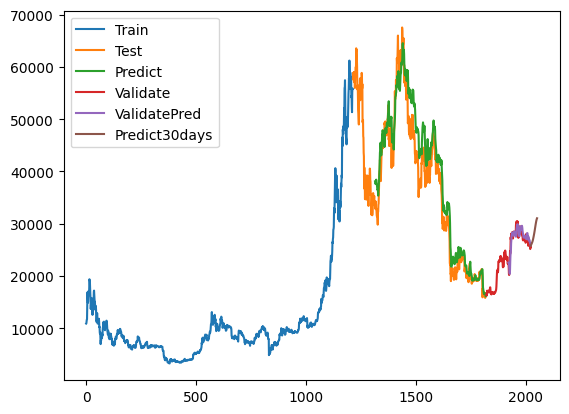

In [19]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred_test))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

In [ ]:
scaler.inverse_transform(lst_output)